# 1- A/B TESTING FOR SUMDATA

##  Preprocessing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import scipy.stats as stats
from scipy.stats import shapiro

pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_sumdata = pd.read_csv("sumdata_df_outlier_detected.csv")
df_salevali = pd.read_csv("salevali_df_outlier_detected.csv")
df_wocommerce = pd.read_csv("wocommerce_df_outlier_detected.csv")
df_whole = pd.read_excel("tum_data.xlsx")

In [3]:
df_sumdata.head()

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit
0,2,2021-09-21,Speyer,D,B2B,WABENHONIG IM HOLZRAHMEN 450G,BAL CESITLERI,WABENHONIG,1.00,11.21,kg,6.91
1,3,2021-10-28,Berlin,D,AMAZON,2X BIO ZITRONEN HONIG 450 GR.,BAL CESITLERI,HONIG,1.00,19.62,Stk.,15.25
2,4,2021-03-31,Lünen,D,B2B,ATOM,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,2.04,21.42,kg,10.83
3,5,2021-10-19,Bologna,I,AMAZON,BAKLAVA MIT PISTAZIEN FISTIKLI 500G,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,1.00,13.44,Stk.,8.49
4,7,2021-04-19,Freigericht,D,B2B,CEVIZICIWALNUSSKERNE,CEREZLER,DIGER CEREZ,5.00,11.68,Stk.,7.43


In [4]:
df_sumdata["Invoice date"] = df_sumdata["Invoice date"].astype("datetime64[ns]")

In [5]:
df_sumdata[(df_sumdata["Invoice date"] >= "2020-02-01") & (df_sumdata["Invoice date"] <= "2022-03-31")].sort_values(by = "Invoice date").tail()


,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit
15899,22881,2022-03-26,other,D,B2B,PAPATYA TEE 100G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,8.00,Stk.,4.00
14384,21141,2022-03-26,other,D,B2B,MINZE ZITRONEN TEE - NANE LIMON CAYI 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,8.00,Stk.,4.00
7863,13856,2022-03-26,other,D,B2B,GRANATAPFEL TEE - NAR CAYI 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,9.50,Stk.,0.50
8562,14584,2022-03-26,other,D,B2B,HAGEBUTTENTEE 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,8.00,Stk.,4.00
17529,25202,2022-03-26,other,D,B2B,SCHWARZE MAULBEEREN TEE - KARADUT CAYI 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,9.50,Stk.,0.50


In [6]:
df_sumdata["Covid"] = 0

In [7]:
df_sumdata.head()

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit,Covid
0,2,2021-09-21,Speyer,D,B2B,WABENHONIG IM HOLZRAHMEN 450G,BAL CESITLERI,WABENHONIG,1.00,11.21,kg,6.91,0
1,3,2021-10-28,Berlin,D,AMAZON,2X BIO ZITRONEN HONIG 450 GR.,BAL CESITLERI,HONIG,1.00,19.62,Stk.,15.25,0
2,4,2021-03-31,Lünen,D,B2B,ATOM,ATISTIRMALIK LOKUM VE PESTIL,ATISTIRMALIK LOKUM VE PESTIL,2.04,21.42,kg,10.83,0
3,5,2021-10-19,Bologna,I,AMAZON,BAKLAVA MIT PISTAZIEN FISTIKLI 500G,BAKLAVA VE TATLI CESITLERI,BAKLAVA VE TATLI CESITLERI,1.00,13.44,Stk.,8.49,0
4,7,2021-04-19,Freigericht,D,B2B,CEVIZICIWALNUSSKERNE,CEREZLER,DIGER CEREZ,5.00,11.68,Stk.,7.43,0


In [8]:
for i, j in df_sumdata["Invoice date"].iteritems():
    if ((j >=pd.to_datetime("2020-02-01")) & (j <= pd.to_datetime("2022-03-31"))):
        df_sumdata["Covid"][i] = 1       

In [9]:
df_sumdata["Covid"].value_counts()

1    20349
0     2896
Name: Covid, dtype: int64

In [10]:
df_sumdata[(df_sumdata["Invoice date"] >= "2020-01-28") & (df_sumdata["Invoice date"] <= "2022-03-31")].sort_values(by="Invoice date")

,Unnamed: 0,Invoice date,City,Country,Marketplace,Product Sold,Category,Subcategory,Amount,Total,P_unit,Profit,Covid
3989,4662,2020-01-28,Aachen,D,B2B,DISAR GRUNE OLIVEN-CIZIK ZEYTIN 1 KG,ZEYTIN CESITLERI,ZEYTIN CESITLERI,1.00,5.61,kg,2.80,0
442,664,2020-01-28,Aachen,D,B2B,1KG. DISAR SCHWARZOLIVE AUS GEMLIK,ZEYTIN CESITLERI,ZEYTIN CESITLERI,1.00,6.54,Stk.,3.27,0
4057,4748,2020-01-28,Aachen,D,B2B,DISAR GRUNE OLIVEN-KIRMA ZEYTIN 1 KG,ZEYTIN CESITLERI,ZEYTIN CESITLERI,1.00,5.61,kg,2.80,0
3992,4665,2020-02-01,other,D,B2B,DISAR GRUNE OLIVEN-CIZIK ZEYTIN 1 KG,ZEYTIN CESITLERI,ZEYTIN CESITLERI,2.00,11.21,kg,5.61,1
16982,24250,2020-02-01,other,D,B2B,ROYAL EXTRA LATA 1 L.,ZEYTINYAGI,ZEYTINYAGI,1.00,8.88,Stk.,3.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15899,22881,2022-03-26,other,D,B2B,PAPATYA TEE 100G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,8.00,Stk.,4.00,1
14384,21141,2022-03-26,other,D,B2B,MINZE ZITRONEN TEE - NANE LIMON CAYI 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,8.00,Stk.,4.00,1
7863,13856,2022-03-26,other,D,B2B,GRANATAPFEL TEE - NAR CAYI 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,9.50,Stk.,0.50,1
8562,14584,2022-03-26,other,D,B2B,HAGEBUTTENTEE 250 G,KAHVE VE CAY CESITLERI,KAHVE VE CAY CESITLERI,5.00,8.00,Stk.,4.00,1


In [11]:
df_sumdata.set_index("Invoice date", inplace =True)

###  Aylık bazlı inceleme(Monthly)

In [12]:
df_sumdata_monthly = df_sumdata.resample("M").mean()

In [13]:
df_sumdata_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2017-08-31 to 2022-04-30
Freq: M
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  57 non-null     float64
 1   Amount      57 non-null     float64
 2   Total       57 non-null     float64
 3   Profit      57 non-null     float64
 4   Covid       57 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB


In [14]:
df_sumdata_monthly.Covid.value_counts()

0.00    31
1.00    26
Name: Covid, dtype: int64

In [15]:
df_sumdata_monthly["Covid"] = df_sumdata_monthly.Covid.map({0 : 'No', 1 : 'Yes'})

In [16]:
df_sumdata_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2017-08-31 to 2022-04-30
Freq: M
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  57 non-null     float64
 1   Amount      57 non-null     float64
 2   Total       57 non-null     float64
 3   Profit      57 non-null     float64
 4   Covid       57 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


In [17]:
df_sumdata_monthly.Covid.value_counts()

No     31
Yes    26
Name: Covid, dtype: int64

In [18]:
df_sumdata_monthly

,Unnamed: 0,Amount,Total,Profit,Covid
Invoice date,,,,,
2017-08-31,12497.50,2.00,8.20,4.07,No
2017-09-30,5474.46,1.00,12.04,6.25,No
2017-10-31,18413.67,2.33,16.87,8.70,No
2017-11-30,11186.59,1.35,12.51,6.42,No
2017-12-31,6327.18,1.59,11.87,6.38,No
2018-01-31,10937.57,1.17,14.66,7.87,No
2018-02-28,15857.81,1.22,13.02,7.40,No
2018-03-31,12357.19,1.11,15.46,8.32,No
2018-04-30,16817.03,1.11,15.37,8.50,No


In [19]:
df_sumdata_monthly.reset_index(inplace = True)

In [20]:
df_sumdata_monthly["Yes"] = 0
df_sumdata_monthly["No"] = 0

In [21]:
for i, j in df_sumdata_monthly["Covid"].iteritems():
    if j == "Yes":
        df_sumdata_monthly["Yes"].iloc[i] = df_sumdata_monthly["Total"].iloc[i]
    else:
        df_sumdata_monthly["No"].iloc[i] = df_sumdata_monthly["Total"].iloc[i]

In [22]:
Grup_Yes = df_sumdata_monthly[df_sumdata_monthly["Yes"] != 0][["Total","Yes"]]
Grup_Yes

,Total,Yes
30,10.11,10.11
31,10.84,10.84
32,8.67,8.67
33,10.24,10.24
34,6.93,6.93
35,8.61,8.61
36,12.56,12.56
37,13.17,13.17
38,12.89,12.89
39,12.46,12.46


In [23]:
len(Grup_Yes)

26

In [24]:
Grup_No = df_sumdata_monthly[df_sumdata_monthly["No"] != 0][["Total","No"]]
Grup_No

,Total,No
0,8.20,8.20
1,12.04,12.04
2,16.87,16.87
3,12.51,12.51
4,11.87,11.87
5,14.66,14.66
6,13.02,13.02
7,15.46,15.46
8,15.37,15.37
9,15.53,15.53


In [25]:
len(Grup_No)

31

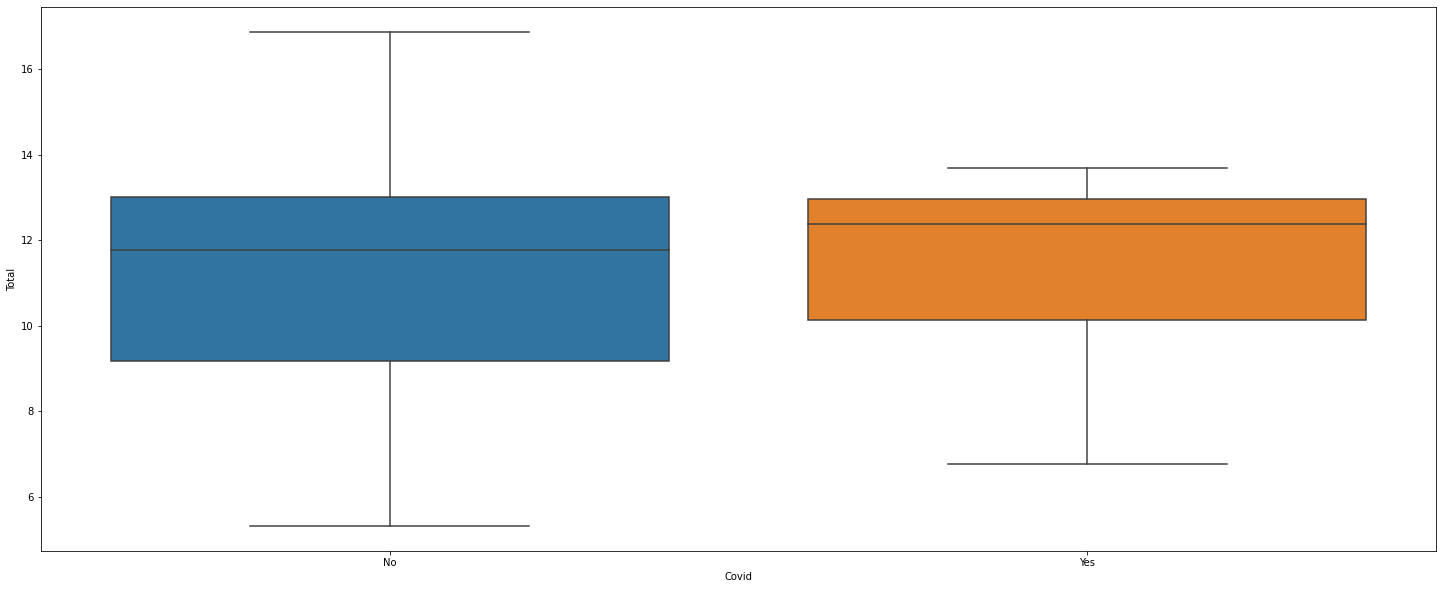

In [26]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Total", data = df_sumdata_monthly);

####  AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki aylık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki aylık ortalama satışlar normal dağılmamaktadır.

In [27]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Total)

ShapiroResult(statistic=0.8642173409461975, pvalue=0.0027184998616576195)

* Ho reddedildi. Covid dönemindeki aylık ortalama satışlar normal dağılmamaktadır.

In [28]:
shapiro(Grup_No.Total)

ShapiroResult(statistic=0.9655327200889587, pvalue=0.40524357557296753)

* Ho reddedilmez. Covid dönemi öncesi aylık ortalama satışlar normal dağılmaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [29]:
stats.levene(Grup_Yes.Total, Grup_No.Total)

LeveneResult(statistic=4.284578535372888, pvalue=0.043168791194307846)

* Ho reddedilir. Varyanslar Homojen değildir.

* Normallik testleri sonucunda Covid öncesi satış ortalamalarının dağılımı normal dağılmaktadır. Ancak Covid dönemi satış ortalamalarının dağılımı normal dağılmadığı görülmektedir. 
* İki döneminde varyasnları homojen değildir.
* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

##### Hipotez Testi

* Ho: Covid öncesi ve Covid dönemlerinin aylık satış ortalamaları arasında fark yoktur.
* H1: Covid öncesi ve Covid dönemlerinin aylık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygunacaktı.

In [30]:
stats.ttest_ind(Grup_Yes.Total, Grup_No.Total, equal_var = True)

Ttest_indResult(statistic=0.19939359361105735, pvalue=0.8426902127670475)

* Ho reddedilmez. Her iki dönem aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

##### 2. Non parametrik Test

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

In [31]:
stats.mannwhitneyu(Grup_Yes.Total, Grup_No.Total)

MannwhitneyuResult(statistic=440.0, pvalue=0.5586870888886388)

* Ho reddedilmez. Her iki dönem aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

### Haftalık bazlı inceleme(Weekly)

In [32]:
df_sumdata_weekly = df_sumdata.resample("W").mean()

In [33]:
df_sumdata_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2017-09-03 to 2022-04-24
Freq: W-SUN
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  216 non-null    float64
 1   Amount      216 non-null    float64
 2   Total       216 non-null    float64
 3   Profit      216 non-null    float64
 4   Covid       216 non-null    float64
dtypes: float64(5)
memory usage: 11.4 KB


In [34]:
df_sumdata_weekly

,Unnamed: 0,Amount,Total,Profit,Covid
Invoice date,,,,,
2017-09-03,9433.33,1.67,9.36,4.74,0.00
2017-09-10,1069.00,1.00,20.56,10.71,0.00
2017-09-17,3338.67,1.00,8.59,4.48,0.00
2017-09-24,7097.25,1.00,12.31,6.38,0.00
2017-10-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-03-27,15103.95,2.04,11.01,6.58,1.00
2022-04-03,NaN,NaN,NaN,NaN,NaN
2022-04-10,13247.67,1.67,11.01,3.84,0.00


In [35]:
df_sumdata_weekly.Covid.value_counts(dropna=False)

1.00    109
0.00    106
NaN      27
0.94      1
Name: Covid, dtype: int64

In [36]:
for i,j in df_sumdata_weekly.Covid.iteritems():
    print(i,j)

2017-09-03 00:00:00 0.0
2017-09-10 00:00:00 0.0
2017-09-17 00:00:00 0.0
2017-09-24 00:00:00 0.0
2017-10-01 00:00:00 nan
2017-10-08 00:00:00 0.0
2017-10-15 00:00:00 nan
2017-10-22 00:00:00 nan
2017-10-29 00:00:00 nan
2017-11-05 00:00:00 0.0
2017-11-12 00:00:00 0.0
2017-11-19 00:00:00 0.0
2017-11-26 00:00:00 0.0
2017-12-03 00:00:00 0.0
2017-12-10 00:00:00 0.0
2017-12-17 00:00:00 0.0
2017-12-24 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-07 00:00:00 0.0
2018-01-14 00:00:00 0.0
2018-01-21 00:00:00 0.0
2018-01-28 00:00:00 0.0
2018-02-04 00:00:00 0.0
2018-02-11 00:00:00 0.0
2018-02-18 00:00:00 0.0
2018-02-25 00:00:00 0.0
2018-03-04 00:00:00 0.0
2018-03-11 00:00:00 0.0
2018-03-18 00:00:00 0.0
2018-03-25 00:00:00 0.0
2018-04-01 00:00:00 0.0
2018-04-08 00:00:00 0.0
2018-04-15 00:00:00 0.0
2018-04-22 00:00:00 0.0
2018-04-29 00:00:00 0.0
2018-05-06 00:00:00 0.0
2018-05-13 00:00:00 0.0
2018-05-20 00:00:00 0.0
2018-05-27 00:00:00 0.0
2018-06-03 00:00:00 nan
2018-06-10 00:00:00 0.0
2018-06-17 00:00

In [37]:
df_sumdata_weekly[df_sumdata_weekly.index == pd.to_datetime("2020-02-02")]


,Unnamed: 0,Amount,Total,Profit,Covid
Invoice date,,,,,
2020-02-02,13931.31,1.35,8.58,3.54,0.94


In [38]:
df_sumdata_weekly.Covid.loc["2020-02-02"] = 1

In [39]:
df_sumdata_weekly.isnull().sum()

Unnamed: 0    27
Amount        27
Total         27
Profit        27
Covid         27
dtype: int64

In [40]:
df_sumdata_weekly[df_sumdata_weekly["Covid"].isnull() ]

,Unnamed: 0,Amount,Total,Profit,Covid
Invoice date,,,,,
2017-10-01,NaN,NaN,NaN,NaN,NaN
2017-10-15,NaN,NaN,NaN,NaN,NaN
2017-10-22,NaN,NaN,NaN,NaN,NaN
2017-10-29,NaN,NaN,NaN,NaN,NaN
2018-06-03,NaN,NaN,NaN,NaN,NaN
2018-06-17,NaN,NaN,NaN,NaN,NaN
2018-07-01,NaN,NaN,NaN,NaN,NaN
2018-07-15,NaN,NaN,NaN,NaN,NaN
2018-09-09,NaN,NaN,NaN,NaN,NaN


In [41]:
df_sumdata_weekly.dropna(how="all",inplace = True)

In [42]:
df_sumdata_weekly[df_sumdata_weekly["Covid"].isnull() ]

,Unnamed: 0,Amount,Total,Profit,Covid
Invoice date,,,,,


In [43]:
df_sumdata_weekly["Covid"] = df_sumdata_weekly.Covid.map({0 : 'No', 1 : 'Yes'})

In [44]:
df_sumdata_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 216 entries, 2017-09-03 to 2022-04-24
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  216 non-null    float64
 1   Amount      216 non-null    float64
 2   Total       216 non-null    float64
 3   Profit      216 non-null    float64
 4   Covid       216 non-null    object 
dtypes: float64(4), object(1)
memory usage: 10.1+ KB


In [45]:
df_sumdata_weekly.Covid.value_counts()

Yes    110
No     106
Name: Covid, dtype: int64

In [46]:
df_sumdata_weekly

,Unnamed: 0,Amount,Total,Profit,Covid
Invoice date,,,,,
2017-09-03,9433.33,1.67,9.36,4.74,No
2017-09-10,1069.00,1.00,20.56,10.71,No
2017-09-17,3338.67,1.00,8.59,4.48,No
2017-09-24,7097.25,1.00,12.31,6.38,No
2017-10-08,19706.50,3.00,19.51,10.17,No
...,...,...,...,...,...
2022-03-20,17789.21,2.29,9.74,3.82,Yes
2022-03-27,15103.95,2.04,11.01,6.58,Yes
2022-04-10,13247.67,1.67,11.01,3.84,No


In [47]:
df_sumdata_weekly.reset_index(inplace = True)

In [48]:
df_sumdata_weekly["Yes"] = 0
df_sumdata_weekly["No"] = 0

In [49]:
for i, j in df_sumdata_weekly["Covid"].iteritems():
    if j == "Yes":
        df_sumdata_weekly["Yes"].iloc[i] = df_sumdata_weekly["Total"].iloc[i]
    else:
        df_sumdata_weekly["No"].iloc[i] = df_sumdata_weekly["Total"].iloc[i]

In [50]:
Grup_Yes_w = df_sumdata_weekly[df_sumdata_weekly["Yes"] != 0][["Total","Yes"]]
Grup_Yes_w

,Total,Yes
103,8.58,8.58
104,11.19,11.19
105,11.90,11.90
106,9.88,9.88
107,9.74,9.74
...,...,...
208,7.86,7.86
209,10.14,10.14
210,9.78,9.78
211,9.74,9.74


In [51]:
len(Grup_Yes_w)

110

In [52]:
Grup_No_w = df_sumdata_weekly[df_sumdata_weekly["No"] != 0][["Total","No"]]
Grup_No_w

,Total,No
0,9.36,9.36
1,20.56,20.56
2,8.59,8.59
3,12.31,12.31
4,19.51,19.51
...,...,...
101,8.56,8.56
102,6.93,6.93
213,11.01,11.01
214,3.62,3.62


In [53]:
len(Grup_No_w)

106

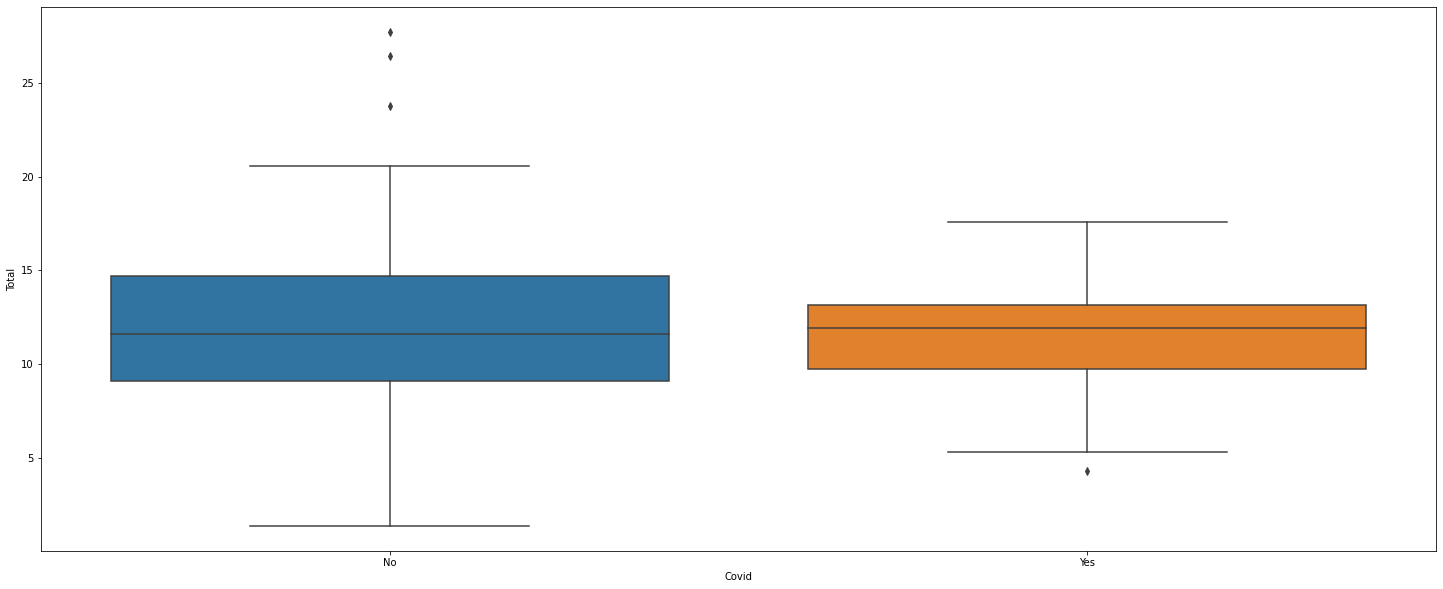

In [54]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Total", data = df_sumdata_weekly);

####  AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki haftalık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [55]:
from scipy.stats import shapiro

shapiro(Grup_Yes_w.Total)

ShapiroResult(statistic=0.9434377551078796, pvalue=0.000150377512909472)

* Ho reddedildi. Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [56]:
shapiro(Grup_No_w.Total)

ShapiroResult(statistic=0.9600911736488342, pvalue=0.00287150451913476)

* Ho reddedildi. Covid dönemi öncesindeki haftalık ortalama satışlar normal dağılmamaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [57]:
stats.levene(Grup_Yes_w.Total, Grup_No_w.Total)

LeveneResult(statistic=17.343603848460894, pvalue=4.523706452457433e-05)

* Ho reddedilir. Varyanslar Homojen değildir.

* Normallik testleri sonucunda Covid öncesi ve  Covid dönemi satış ortalamalarının dağılımının normal dağılmadığı görülmektedir. 
* İki döneminde varyasnları homojen değildir.
* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

##### Hipotez Testi

* Ho: Covid öncesi ve Covid dönemlerinin haftalık satış ortalamaları arasında fark yoktur.
* H1: Covid öncesi ve Covid dönemlerinin haftalık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygunacaktı.

In [58]:
stats.ttest_ind(Grup_Yes_w.Total, Grup_No_w.Total, equal_var = True)

Ttest_indResult(statistic=-1.2406920661673893, pvalue=0.21607797741316326)

* Ho reddedilmez. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

##### 2. Non parametrik Test

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

In [59]:
stats.mannwhitneyu(Grup_Yes_w.Total, Grup_No_w.Total)

MannwhitneyuResult(statistic=5477.0, pvalue=0.44268743036253533)

* Ho reddedilmez. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

# 2- A/B TESTING FOR WOCOMMERCE

##  Preprocessing Data

In [60]:
df_wocommerce = pd.read_csv("wocommerce_df_outlier_detected.csv")

In [61]:
df_wocommerce.head()

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year
0,0,Abgeschlossen,2017-07-21 14:34:00,Essen,45143,DE,PayPal,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,1,HONIG,BAL CESITLERI,0,PERGAMO,11.68,5,7
1,1,Abgeschlossen,2017-09-05 12:05:31,Köln,50668,DE,PayPal,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,1,ZEYTINYAGI,ZEYTINYAGI,0,PERGAMO,20.56,2,9
2,2,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG LAVANDEL 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9
3,3,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ORANGENBLUTEN 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9
4,4,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ZITRONE 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.97,7,9


In [62]:
df_wocommerce["Order Date"] = df_wocommerce["Order Date"].astype("datetime64[ns]")

In [63]:
df_wocommerce[(df_wocommerce["Order Date"] >= "2020-02-01") & (df_wocommerce["Order Date"] <= "2022-03-31")].sort_values(by = "Order Date").tail()


,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year
7286,8384,Abgeschlossen,2022-03-30 18:44:01,Pfullingen,72793,DE,Überweisung,WALNUSS IN SCHALE ERNTE 2021 ROH UND UNVERARBE...,1,WALNUSS,CEREZLER,1,PERGAMO,17.35,3,3
7287,8385,Abgeschlossen,2022-03-30 18:44:01,Pfullingen,72793,DE,Überweisung,PREMIUM MEDJOOL DATTELN PREMIUM 1 KG,1,HURMA,HURMA,0,PERGAMO,8.43,3,3
7290,8388,Abgeschlossen,2022-03-30 18:44:01,Pfullingen,72793,DE,Überweisung,PERGAMO GRUNE OLIVEN MIT HAND GESCHLAGEN 100% ...,1,ZEYTIN CESITLERI,ZEYTIN CESITLERI,0,PERGAMO,5.21,3,3
7291,8389,Completed,2022-03-30 21:45:44,Berlin,10961,DE,PayPal,MISS ZEYTIN - YESIL CIZIK ZEYTIN - 1200 GR.,1,ZEYTIN CESITLERI,ZEYTIN CESITLERI,1,MEMLEKET PAZARI,5.54,3,3
7292,8391,Completed,2022-03-30 21:45:44,Berlin,10961,DE,PayPal,DOGAL ANTEP FISTIGI - 1000 GR.,1,PISTACHIO,CEREZLER,0,MEMLEKET PAZARI,7.92,3,3


In [64]:
df_wocommerce["Covid"] = 0

In [65]:
df_wocommerce.head()

,Unnamed: 0,Order Status,Order Date,City (Billing),Postcode (Billing),Country Code (Billing),Payment Method Title,Item Name,Quantity,Sub_Category,Category,Coupon Code,Website,Sales,Day_of_Week,Month_of_Year,Covid
0,0,Abgeschlossen,2017-07-21 14:34:00,Essen,45143,DE,PayPal,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,1,HONIG,BAL CESITLERI,0,PERGAMO,11.68,5,7,0
1,1,Abgeschlossen,2017-09-05 12:05:31,Köln,50668,DE,PayPal,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,1,ZEYTINYAGI,ZEYTINYAGI,0,PERGAMO,20.56,2,9,0
2,2,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG LAVANDEL 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9,0
3,3,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ORANGENBLUTEN 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.40,7,9,0
4,4,Abgeschlossen,2017-09-10 12:53:04,Oldenburg,26129,DE,PayPal,BIO HONIG ZITRONE 450 GR,1,HONIG,BAL CESITLERI,0,PERGAMO,8.97,7,9,0


In [66]:
for i, j in df_wocommerce["Order Date"].iteritems():
    if ((j >=pd.to_datetime("2020-02-01")) & (j <= pd.to_datetime("2022-03-31"))):
        df_wocommerce["Covid"][i] = 1       

In [67]:
df_wocommerce["Covid"].value_counts()

1    7007
0    6456
Name: Covid, dtype: int64

In [68]:
df_wocommerce.set_index("Order Date", inplace =True)

### Aylık bazlı inceleme(Monthly)

In [69]:
df_wocommerce_monthly = df_wocommerce.resample("M").mean()

In [70]:
df_wocommerce_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-31
Freq: M
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     59 non-null     float64
 1   Quantity       59 non-null     float64
 2   Coupon Code    59 non-null     float64
 3   Sales          59 non-null     float64
 4   Day_of_Week    59 non-null     float64
 5   Month_of_Year  59 non-null     float64
 6   Covid          59 non-null     float64
dtypes: float64(7)
memory usage: 3.8 KB


In [71]:
df_wocommerce_monthly.Covid.value_counts(dropna=False)

0.00    33
1.00    25
NaN      2
0.96     1
Name: Covid, dtype: int64

In [72]:
df_wocommerce_monthly[df_wocommerce_monthly["Covid"].isnull()]

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Covid
Order Date,,,,,,,
2017-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_wocommerce_monthly.dropna(how = "all", inplace = True)

In [74]:
df_wocommerce_monthly.Covid.value_counts(dropna=False)

0.00    33
1.00    25
0.96     1
Name: Covid, dtype: int64

In [75]:
for i,j in df_wocommerce_monthly.Covid.iteritems():
    print(i,j)

2017-07-31 00:00:00 0.0
2017-09-30 00:00:00 0.0
2017-10-31 00:00:00 0.0
2017-11-30 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-31 00:00:00 0.0
2018-02-28 00:00:00 0.0
2018-03-31 00:00:00 0.0
2018-04-30 00:00:00 0.0
2018-05-31 00:00:00 0.0
2018-06-30 00:00:00 0.0
2018-08-31 00:00:00 0.0
2018-09-30 00:00:00 0.0
2018-10-31 00:00:00 0.0
2018-11-30 00:00:00 0.0
2018-12-31 00:00:00 0.0
2019-01-31 00:00:00 0.0
2019-02-28 00:00:00 0.0
2019-03-31 00:00:00 0.0
2019-04-30 00:00:00 0.0
2019-05-31 00:00:00 0.0
2019-06-30 00:00:00 0.0
2019-07-31 00:00:00 0.0
2019-08-31 00:00:00 0.0
2019-09-30 00:00:00 0.0
2019-10-31 00:00:00 0.0
2019-11-30 00:00:00 0.0
2019-12-31 00:00:00 0.0
2020-01-31 00:00:00 0.0
2020-02-29 00:00:00 1.0
2020-03-31 00:00:00 1.0
2020-04-30 00:00:00 1.0
2020-05-31 00:00:00 1.0
2020-06-30 00:00:00 1.0
2020-07-31 00:00:00 1.0
2020-08-31 00:00:00 1.0
2020-09-30 00:00:00 1.0
2020-10-31 00:00:00 1.0
2020-11-30 00:00:00 1.0
2020-12-31 00:00:00 1.0
2021-01-31 00:00:00 1.0
2021-02-28 00:00

In [76]:

df_wocommerce_monthly.Covid.loc["2022-03-31"] = 1

In [77]:
df_wocommerce_monthly.Covid.value_counts(dropna=False)

0.00    33
1.00    26
Name: Covid, dtype: int64

In [78]:
df_wocommerce_monthly["Covid"] = df_wocommerce_monthly.Covid.map({0 : 'No', 1 : 'Yes'})

In [79]:
df_wocommerce_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-07-31 to 2022-07-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     59 non-null     float64
 1   Quantity       59 non-null     float64
 2   Coupon Code    59 non-null     float64
 3   Sales          59 non-null     float64
 4   Day_of_Week    59 non-null     float64
 5   Month_of_Year  59 non-null     float64
 6   Covid          59 non-null     object 
dtypes: float64(6), object(1)
memory usage: 5.7+ KB


In [80]:
df_wocommerce_monthly.Covid.value_counts(dropna=False)

No     33
Yes    26
Name: Covid, dtype: int64

In [81]:
df_wocommerce_monthly

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Covid
Order Date,,,,,,,
2017-07-31,0.00,1.00,0.00,11.68,5.00,7.00,No
2017-09-30,6.50,1.00,0.00,12.07,3.92,9.00,No
2017-10-31,17.00,2.00,0.00,11.04,6.00,10.00,No
2017-11-30,23.67,1.33,0.00,8.84,3.00,11.00,No
2017-12-31,34.75,1.25,0.00,11.37,2.92,12.00,No
2018-01-31,48.00,1.50,0.00,10.85,3.50,1.00,No
2018-02-28,58.18,1.55,0.00,8.91,2.64,2.00,No
2018-03-31,80.08,1.15,0.00,8.94,4.85,3.00,No
2018-04-30,99.50,1.00,0.00,5.77,1.00,4.00,No


In [82]:
df_wocommerce_monthly.reset_index(inplace = True)

In [83]:
df_wocommerce_monthly["Yes"] = 0
df_wocommerce_monthly["No"] = 0

In [84]:
for i, j in df_wocommerce_monthly["Covid"].iteritems():
    if j == "Yes":
        df_wocommerce_monthly["Yes"].iloc[i] = df_wocommerce_monthly["Sales"].iloc[i]
    else:
        df_wocommerce_monthly["No"].iloc[i] = df_wocommerce_monthly["Sales"].iloc[i]

In [85]:
Grup_Yes = df_wocommerce_monthly[df_wocommerce_monthly["Yes"] != 0][["Sales","Yes"]]
Grup_Yes

,Sales,Yes
29,14.64,14.64
30,8.04,8.04
31,8.35,8.35
32,9.95,9.95
33,10.45,10.45
34,9.49,9.49
35,7.19,7.19
36,14.11,14.11
37,12.20,12.20
38,11.26,11.26


In [86]:
len(Grup_Yes)

26

In [87]:
Grup_No = df_wocommerce_monthly[df_wocommerce_monthly["No"] != 0][["Sales","No"]]
Grup_No

,Sales,No
0,11.68,11.68
1,12.07,12.07
2,11.04,11.04
3,8.84,8.84
4,11.37,11.37
5,10.85,10.85
6,8.91,8.91
7,8.94,8.94
8,5.77,5.77
9,13.95,13.95


In [88]:
len(Grup_No)

33

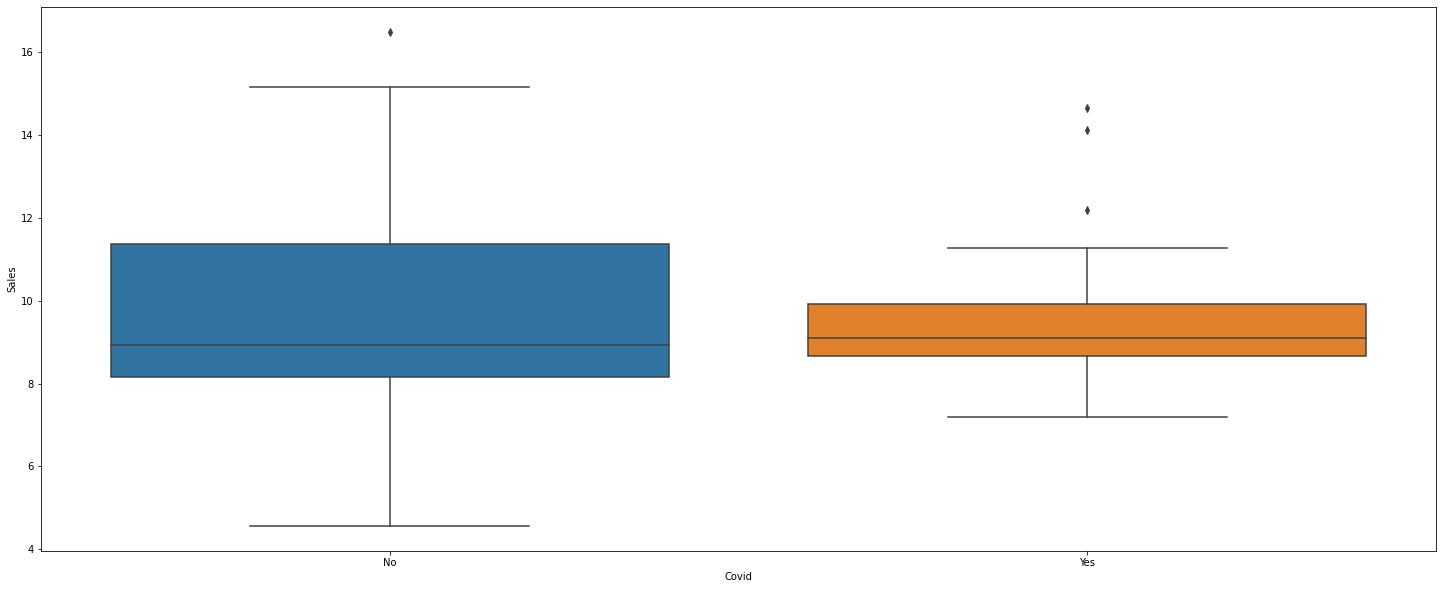

In [89]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Sales", data = df_wocommerce_monthly);

####  AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki aylık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki aylık ortalama satışlar normal dağılmamaktadır.

In [90]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Sales)

ShapiroResult(statistic=0.8264445066452026, pvalue=0.0005136901745572686)

* Ho reddedildi. Covid dönemindeki aylık ortalama satışlar normal dağılmamaktadır.

In [91]:
shapiro(Grup_No.Sales)

ShapiroResult(statistic=0.9599326252937317, pvalue=0.2573525607585907)

* Ho reddedilmez. Covid dönemi öncesi aylık ortalama satışlar normal dağılmaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [92]:
stats.levene(Grup_Yes.Sales, Grup_No.Sales)

LeveneResult(statistic=2.7917026140958994, pvalue=0.10023601798813805)

* Ho reddedimez. Varyanslar Homojendir.

* Normallik testleri sonucunda Covid öncesi satış ortalamalarının dağılımı normal dağılmaktadır. Ancak Covid dönemi satış ortalamalarının dağılımı normal dağılmadığı görülmektedir. 
* İki döneminde varyansları homojendir.
* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

##### Hipotez Testi

* Ho: Covid öncesi ve Covid dönemlerinin aylık satış ortalamaları arasında fark yoktur.
* H1: Covid öncesi ve Covid dönemlerinin aylık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygunacaktı.

In [93]:
stats.ttest_ind(Grup_Yes.Sales, Grup_No.Sales, equal_var = True)

Ttest_indResult(statistic=-0.22792579223890205, pvalue=0.8205195787326425)

* Ho reddedilmez. Her iki dönem aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

##### 2. Non parametrik Test

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

In [94]:
stats.mannwhitneyu(Grup_Yes.Sales, Grup_No.Sales)

MannwhitneyuResult(statistic=424.0, pvalue=0.9452250018670376)

* Ho reddedilmez. Her iki dönem aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

### Haftalık bazlı inceleme(Weekly)

In [95]:
df_wocommerce_weekly = df_wocommerce.resample("W").mean()

In [96]:
df_wocommerce_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2017-07-23 to 2022-07-03
Freq: W-SUN
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     190 non-null    float64
 1   Quantity       190 non-null    float64
 2   Coupon Code    190 non-null    float64
 3   Sales          190 non-null    float64
 4   Day_of_Week    190 non-null    float64
 5   Month_of_Year  190 non-null    float64
 6   Covid          190 non-null    float64
dtypes: float64(7)
memory usage: 16.2 KB


In [97]:
df_wocommerce_weekly

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Covid
Order Date,,,,,,,
2017-07-23,0.00,1.00,0.00,11.68,5.00,7.00,0.00
2017-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-06-05,13613.57,1.14,0.09,7.62,4.08,5.72,0.00
2022-06-12,14147.12,1.21,0.11,8.64,3.65,6.00,0.00
2022-06-19,14550.19,1.22,0.09,8.51,3.27,6.00,0.00


In [98]:
df_wocommerce_weekly.Covid.value_counts(dropna=False)

1.00    106
0.00     83
NaN      69
0.16      1
Name: Covid, dtype: int64

In [99]:
for i,j in df_wocommerce_weekly.Covid.iteritems():
    print(i,j)

2017-07-23 00:00:00 0.0
2017-07-30 00:00:00 nan
2017-08-06 00:00:00 nan
2017-08-13 00:00:00 nan
2017-08-20 00:00:00 nan
2017-08-27 00:00:00 nan
2017-09-03 00:00:00 nan
2017-09-10 00:00:00 0.0
2017-09-17 00:00:00 nan
2017-09-24 00:00:00 0.0
2017-10-01 00:00:00 nan
2017-10-08 00:00:00 0.0
2017-10-15 00:00:00 nan
2017-10-22 00:00:00 nan
2017-10-29 00:00:00 nan
2017-11-05 00:00:00 nan
2017-11-12 00:00:00 0.0
2017-11-19 00:00:00 nan
2017-11-26 00:00:00 0.0
2017-12-03 00:00:00 nan
2017-12-10 00:00:00 0.0
2017-12-17 00:00:00 0.0
2017-12-24 00:00:00 nan
2017-12-31 00:00:00 0.0
2018-01-07 00:00:00 0.0
2018-01-14 00:00:00 0.0
2018-01-21 00:00:00 nan
2018-01-28 00:00:00 nan
2018-02-04 00:00:00 0.0
2018-02-11 00:00:00 0.0
2018-02-18 00:00:00 0.0
2018-02-25 00:00:00 0.0
2018-03-04 00:00:00 0.0
2018-03-11 00:00:00 0.0
2018-03-18 00:00:00 0.0
2018-03-25 00:00:00 0.0
2018-04-01 00:00:00 0.0
2018-04-08 00:00:00 nan
2018-04-15 00:00:00 nan
2018-04-22 00:00:00 0.0
2018-04-29 00:00:00 nan
2018-05-06 00:00

In [100]:
# "2022-04-03"
df_wocommerce_weekly.Covid.loc["2022-04-03"] = 0

In [101]:
df_wocommerce_weekly[df_wocommerce_weekly["Covid"].isnull()]


,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Covid
Order Date,,,,,,,
2017-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df_wocommerce_weekly.dropna(how = "all", inplace = True)

In [103]:
df_wocommerce_weekly["Covid"] = df_wocommerce_weekly.Covid.map({0 : 'No', 1 : 'Yes'})

In [104]:
df_wocommerce_weekly.isnull().sum()

Unnamed: 0       0
Quantity         0
Coupon Code      0
Sales            0
Day_of_Week      0
Month_of_Year    0
Covid            0
dtype: int64

In [105]:
df_wocommerce_weekly[df_wocommerce_weekly["Covid"].isnull() ]

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Covid
Order Date,,,,,,,


In [106]:
df_wocommerce_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 190 entries, 2017-07-23 to 2022-07-03
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     190 non-null    float64
 1   Quantity       190 non-null    float64
 2   Coupon Code    190 non-null    float64
 3   Sales          190 non-null    float64
 4   Day_of_Week    190 non-null    float64
 5   Month_of_Year  190 non-null    float64
 6   Covid          190 non-null    object 
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


In [107]:
df_wocommerce_weekly.Covid.value_counts()

Yes    106
No      84
Name: Covid, dtype: int64

In [108]:
df_wocommerce_weekly

,Unnamed: 0,Quantity,Coupon Code,Sales,Day_of_Week,Month_of_Year,Covid
Order Date,,,,,,,
2017-07-23,0.00,1.00,0.00,11.68,5.00,7.00,No
2017-09-10,2.50,1.00,0.00,11.58,5.75,9.00,No
2017-09-24,8.50,1.00,0.00,12.31,3.00,9.00,No
2017-10-08,17.00,2.00,0.00,11.04,6.00,10.00,No
2017-11-12,22.00,1.00,0.00,7.94,5.00,11.00,No
...,...,...,...,...,...,...,...
2022-06-05,13613.57,1.14,0.09,7.62,4.08,5.72,No
2022-06-12,14147.12,1.21,0.11,8.64,3.65,6.00,No
2022-06-19,14550.19,1.22,0.09,8.51,3.27,6.00,No


In [109]:
df_wocommerce_weekly.reset_index(inplace = True)

In [110]:
df_wocommerce_weekly["Yes"] = 0
df_wocommerce_weekly["No"] = 0

In [111]:
for i, j in df_wocommerce_weekly["Covid"].iteritems():
    if j == "Yes":
        df_wocommerce_weekly["Yes"].iloc[i] = df_wocommerce_weekly["Sales"].iloc[i]
    else:
        df_wocommerce_weekly["No"].iloc[i] = df_wocommerce_weekly["Sales"].iloc[i]

In [112]:
Grup_Yes_w = df_wocommerce_weekly[df_wocommerce_weekly["Yes"] != 0][["Sales","Yes"]]
Grup_Yes_w

,Sales,Yes
70,16.80,16.80
71,4.68,4.68
72,22.44,22.44
73,14.26,14.26
74,16.80,16.80
...,...,...
171,7.48,7.48
172,7.42,7.42
173,8.30,8.30
174,9.22,9.22


In [113]:
len(Grup_Yes_w)

106

In [114]:
Grup_No_w = df_wocommerce_weekly[df_wocommerce_weekly["No"] != 0][["Sales","No"]]
Grup_No_w

,Sales,No
0,11.68,11.68
1,11.58,11.58
2,12.31,12.31
3,11.04,11.04
4,7.94,7.94
...,...,...
185,7.62,7.62
186,8.64,8.64
187,8.51,8.51
188,8.66,8.66


In [115]:
len(Grup_No_w)

84

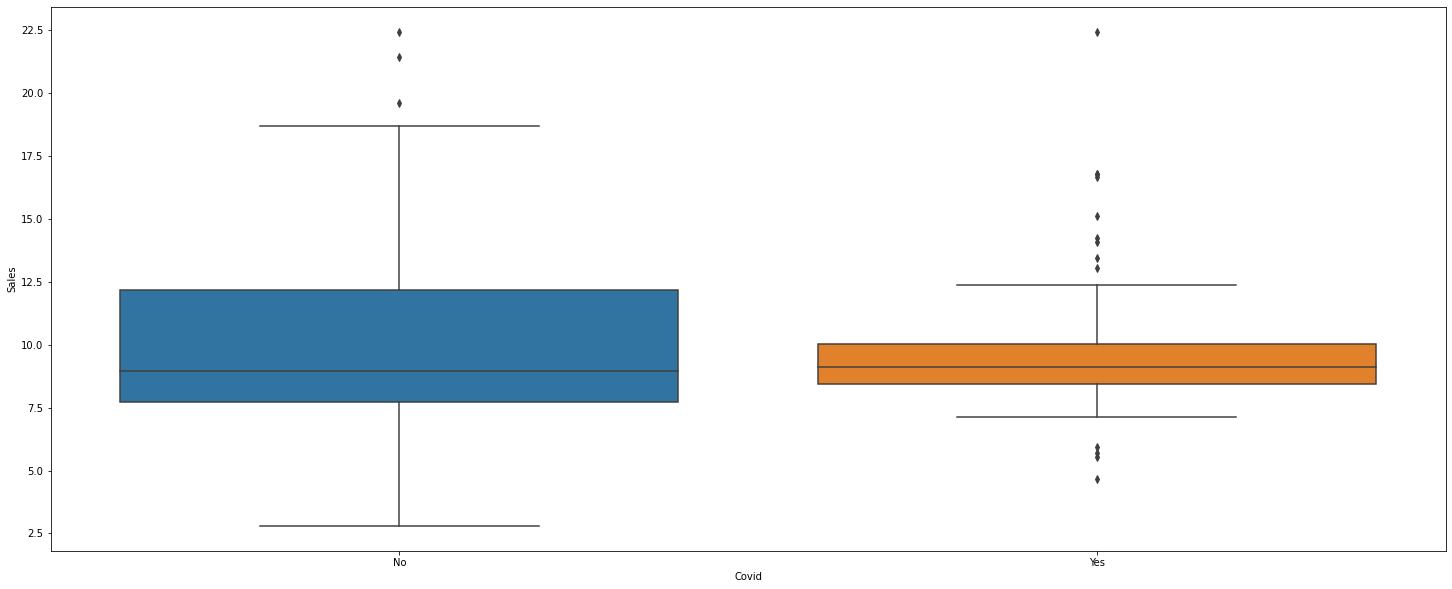

In [116]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Sales", data = df_wocommerce_weekly);

#### AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki haftalık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [117]:
from scipy.stats import shapiro

shapiro(Grup_Yes_w.Sales)

ShapiroResult(statistic=0.8069275617599487, pvalue=1.8001561352676276e-10)

* Ho reddedildi. Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [118]:
shapiro(Grup_No_w.Sales)

ShapiroResult(statistic=0.9062133431434631, pvalue=1.461215470044408e-05)

* Ho reddedildi. Covid dönemi öncesindeki haftalık ortalama satışlar normal dağılmamaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [119]:
stats.levene(Grup_Yes_w.Sales, Grup_No_w.Sales)

LeveneResult(statistic=20.067402524090898, pvalue=1.2957480070190874e-05)

* Ho reddedilir. Varyanslar Homojen değildir.

* Normallik testleri sonucunda Covid öncesi ve  Covid dönemi satış ortalamalarının dağılımının normal dağılmadığı görülmektedir. 
* İki döneminde varyansları homojen değildir.
* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

##### Hipotez Testi

* Ho: Covid öncesi ve Covid dönemlerinin haftalık satış ortalamaları arasında fark yoktur.
* H1: Covid öncesi ve Covid dönemlerinin haftalık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygunacaktı.

In [120]:
stats.ttest_ind(Grup_Yes_w.Sales, Grup_No_w.Sales, equal_var = True)

Ttest_indResult(statistic=-1.7063016052614812, pvalue=0.08960323117036663)

* Ho reddedilmez. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

##### 2. Non parametrik Test

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

In [121]:
stats.mannwhitneyu(Grup_Yes_w.Sales, Grup_No_w.Sales)

MannwhitneyuResult(statistic=4481.0, pvalue=0.9396529618340715)

* Ho reddedilmez. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark yoktur.

# 3- A/B TESTING FOR SALEVALI

## Preprocessing Data

In [122]:
df_salevali = pd.read_csv("salevali_df_outlier_detected.csv")

In [123]:
df_salevali["Date"] = df_salevali["Date"].astype("datetime64[ns]")

In [124]:
df_salevali[(df_salevali["Date"] >= "2020-02-01") & (df_salevali["Date"] <= "2022-03-31")].sort_values(by = "Date").tail()

,Unnamed: 0,Customer,Product Name,Sub_Category,Category,Amount,Sales,Marketplace,Payment Method,Date
14562,15997,KundenID3329,DOGAL KAVRULMUS GIRESUN FINDIK 15-17 MM - 1 KG...,HASELNUSS,CEREZLER,1.00,10.79,Wocommerce,PayPal,2022-03-31
14549,15984,KundenID3317,DOGAL KABUKLU FINDIK - 1000 GR.,HASELNUSS,CEREZLER,1.00,7.49,Wocommerce,PayPal,2022-03-31
8072,9011,KundenID18108,PREMIUM DATTELN MEDJOOL 5 KG,HURMA,HURMA,1.00,38.19,Amazon,Amazon,2022-03-31
8024,8957,KundenID1806,AJWA -ACVE PEYGAMBER HURMASI - 500 GR.,HURMA,HURMA,1.00,6.99,Wocommerce,PayPal,2022-03-31
2452,2911,KundenID12618,NEU SEASON (2021) MEDJOOL PREMIUM JUMBO DATTEL...,HURMA,HURMA,1.00,41.39,Amazon,Amazon,2022-03-31


In [125]:
df_salevali["Covid"] = 0

In [126]:
df_salevali.head()

,Unnamed: 0,Customer,Product Name,Sub_Category,Category,Amount,Sales,Marketplace,Payment Method,Date,Covid
0,0,KundenID1,DESTAN SCHWARZE OLIVEN OLIVE SIYAH ZEYTIN AUS...,ZEYTIN CESITLERI,ZEYTIN CESITLERI,1.00,8.40,Wocommerce,CreditCard,2021-06-29,0
1,2,KundenID100,?HASELNUSSCREME 400 G/ 40% HASELNUSS ANTEIL/ G...,HASELNUSSCREME,RECEL KREMA EZME,1.00,16.76,Amazon,Amazon,2022-04-07,0
2,3,KundenID1000,3 X SERA - JOHANNISBROTSIRUP 680G,PEKMEZ-TAHIN-TAHIN HELVASI,PEKMEZ-TAHIN-TAHIN HELVASI,1.00,19.99,Amazon,Amazon,2021-10-08,0
3,4,KundenID10000,JOHANNISBROT EXTRAKT - KECIBOYNUZU OZU /VEGAN/...,RECEL KREMA EZME,RECEL KREMA EZME,1.00,4.66,Kaufland,Kaufland,2022-03-16,0
4,5,KundenID10001,JOHANNISBROT EXTRAKT - KECIBOYNUZU OZU /VEGAN/...,RECEL KREMA EZME,RECEL KREMA EZME,1.00,4.66,Kaufland,Kaufland,2022-03-16,0


In [127]:
for i, j in df_salevali["Date"].iteritems():
    if ((j >=pd.to_datetime("2020-02-01")) & (j <= pd.to_datetime("2022-03-31"))):
        df_salevali["Covid"][i] = 1       

In [128]:
df_salevali["Covid"].value_counts(dropna=False)

1    17123
0     4541
Name: Covid, dtype: int64

In [129]:
df_salevali.set_index("Date", inplace =True)

### Aylık bazlı inceleme(Monthly)

In [130]:
df_salevali_monthly = df_salevali.resample("M").mean()

In [131]:
df_salevali_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2021-05-31 to 2022-04-30
Freq: M
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12 non-null     float64
 1   Amount      12 non-null     float64
 2   Sales       12 non-null     float64
 3   Covid       12 non-null     float64
dtypes: float64(4)
memory usage: 480.0 bytes


In [132]:
df_salevali_monthly.Covid.value_counts(dropna=False)

1.00    11
0.00     1
Name: Covid, dtype: int64

In [133]:
df_salevali_monthly.index

DatetimeIndex(['2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [134]:
df_salevali_monthly

,Unnamed: 0,Amount,Sales,Covid
Date,,,,
2021-05-31,11484.55,1.18,14.39,1.00
2021-06-30,12941.66,1.20,14.09,1.00
2021-07-31,11911.39,1.18,15.01,1.00
2021-08-31,10714.46,1.18,15.70,1.00
2021-09-30,12253.64,1.13,16.06,1.00
2021-10-31,12792.56,1.13,17.50,1.00
2021-11-30,13342.61,1.10,17.13,1.00
2021-12-31,14127.32,1.09,17.38,1.00
2022-01-31,13696.86,1.14,16.05,1.00


In [135]:
df_salevali_monthly["Covid"] = df_salevali_monthly.Covid.map({0 : 'No', 1 : 'Yes'})

In [136]:
df_salevali_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2021-05-31 to 2022-04-30
Freq: M
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12 non-null     float64
 1   Amount      12 non-null     float64
 2   Sales       12 non-null     float64
 3   Covid       12 non-null     object 
dtypes: float64(3), object(1)
memory usage: 480.0+ bytes


In [137]:
df_salevali_monthly.Covid.value_counts(dropna=False)

Yes    11
No      1
Name: Covid, dtype: int64

In [138]:
df_salevali_monthly

,Unnamed: 0,Amount,Sales,Covid
Date,,,,
2021-05-31,11484.55,1.18,14.39,Yes
2021-06-30,12941.66,1.20,14.09,Yes
2021-07-31,11911.39,1.18,15.01,Yes
2021-08-31,10714.46,1.18,15.70,Yes
2021-09-30,12253.64,1.13,16.06,Yes
2021-10-31,12792.56,1.13,17.50,Yes
2021-11-30,13342.61,1.10,17.13,Yes
2021-12-31,14127.32,1.09,17.38,Yes
2022-01-31,13696.86,1.14,16.05,Yes


In [139]:
df_salevali_monthly.reset_index(inplace = True)

In [140]:
df_salevali_monthly["Yes"] = 0
df_salevali_monthly["No"] = 0

In [141]:
for i, j in df_salevali_monthly["Covid"].iteritems():
    if j == "Yes":
        df_salevali_monthly["Yes"].iloc[i] = df_salevali_monthly["Sales"].iloc[i]
    else:
        df_salevali_monthly["No"].iloc[i] = df_salevali_monthly["Sales"].iloc[i]

In [142]:
Grup_Yes = df_salevali_monthly[df_salevali_monthly["Yes"] != 0][["Sales","Yes"]]
Grup_Yes

,Sales,Yes
0,14.39,14.39
1,14.09,14.09
2,15.01,15.01
3,15.70,15.70
4,16.06,16.06
5,17.50,17.50
6,17.13,17.13
7,17.38,17.38
8,16.05,16.05
9,16.18,16.18


In [143]:
len(Grup_Yes)

11

In [144]:
Grup_No = df_salevali_monthly[df_salevali_monthly["No"] != 0][["Sales","No"]]
Grup_No

,Sales,No
11,14.04,14.04


In [145]:
len(Grup_No)

1

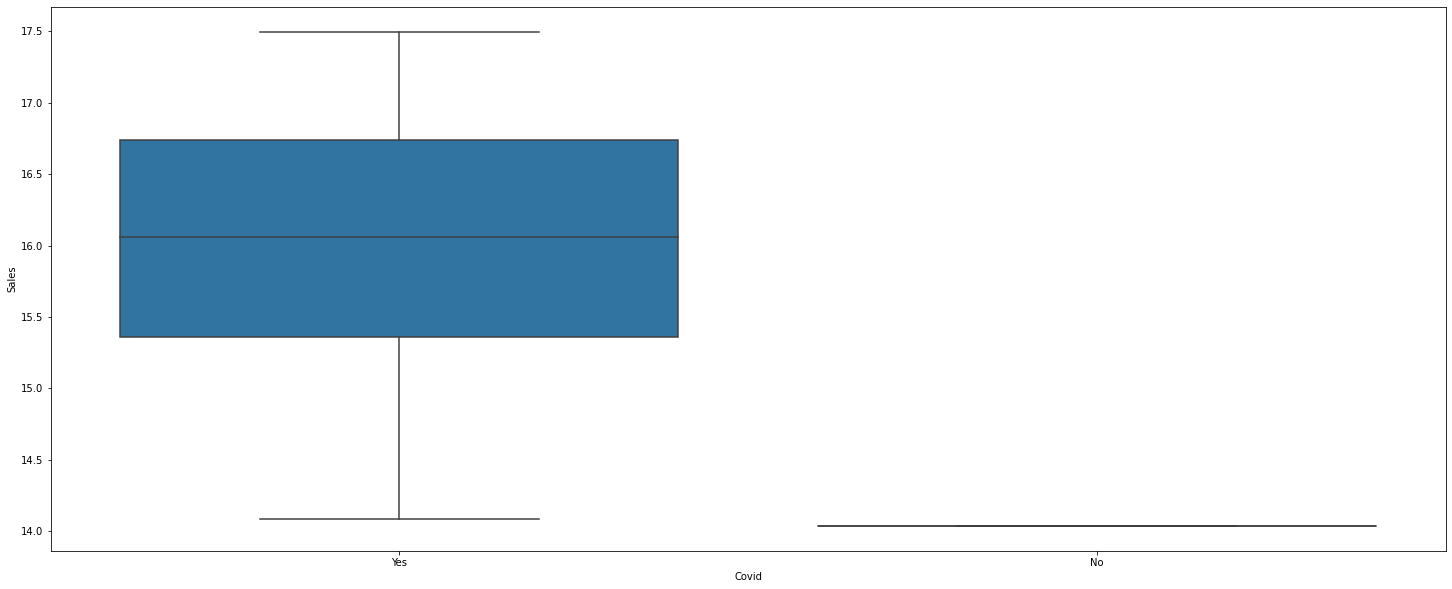

In [146]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Sales", data = df_salevali_monthly);

#### AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki aylık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki aylık ortalama satışlar normal dağılmamaktadır.

In [147]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Sales)

ShapiroResult(statistic=0.9394068717956543, pvalue=0.5135509371757507)

* Ho reddedilmez. Covid dönemi aylık ortalama satışlar normal dağılmaktadır.

In [148]:
# shapiro(Grup_No.Sales)
# Tek veri olduğundan hata vermektedir. (ValueError: Data must be at least length 3.)

* Salevali datasetinde covid dönemi öncesi(şubat 2020) veriler bulunmamaktadır. Sadece covid sonrası bir ay(nisan 2022) veriler bulunmaktadır. Bu nedenle aylık bazlı incelemede tek veri bulunduğundan hata almaktayız. Haftalık bazlı inceleme yapılmıştır.

### Haftalık bazlı inceleme(Weekly)

In [149]:
df_salevali_weekly = df_salevali.resample("W").mean()

In [150]:
df_salevali_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2021-05-09 to 2022-05-01
Freq: W-SUN
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  52 non-null     float64
 1   Amount      52 non-null     float64
 2   Sales       52 non-null     float64
 3   Covid       52 non-null     float64
dtypes: float64(4)
memory usage: 2.0 KB


In [151]:
df_salevali_weekly

,Unnamed: 0,Amount,Sales,Covid
Date,,,,
2021-05-09,10210.23,1.16,15.52,1.00
2021-05-16,11538.47,1.17,14.24,1.00
2021-05-23,12042.88,1.14,15.43,1.00
2021-05-30,11534.98,1.24,13.72,1.00
2021-06-06,12496.61,1.15,15.37,1.00
2021-06-13,13246.72,1.16,13.22,1.00
2021-06-20,11896.21,1.20,15.51,1.00
2021-06-27,13210.44,1.22,12.95,1.00
2021-07-04,12881.94,1.21,13.96,1.00


In [152]:
df_salevali_weekly.Covid.value_counts(dropna=False)

1.00    47
0.00     4
0.40     1
Name: Covid, dtype: int64

In [153]:
for i,j in df_salevali_weekly.Covid.iteritems():
    print(i,j)

2021-05-09 00:00:00 1.0
2021-05-16 00:00:00 1.0
2021-05-23 00:00:00 1.0
2021-05-30 00:00:00 1.0
2021-06-06 00:00:00 1.0
2021-06-13 00:00:00 1.0
2021-06-20 00:00:00 1.0
2021-06-27 00:00:00 1.0
2021-07-04 00:00:00 1.0
2021-07-11 00:00:00 1.0
2021-07-18 00:00:00 1.0
2021-07-25 00:00:00 1.0
2021-08-01 00:00:00 1.0
2021-08-08 00:00:00 1.0
2021-08-15 00:00:00 1.0
2021-08-22 00:00:00 1.0
2021-08-29 00:00:00 1.0
2021-09-05 00:00:00 1.0
2021-09-12 00:00:00 1.0
2021-09-19 00:00:00 1.0
2021-09-26 00:00:00 1.0
2021-10-03 00:00:00 1.0
2021-10-10 00:00:00 1.0
2021-10-17 00:00:00 1.0
2021-10-24 00:00:00 1.0
2021-10-31 00:00:00 1.0
2021-11-07 00:00:00 1.0
2021-11-14 00:00:00 1.0
2021-11-21 00:00:00 1.0
2021-11-28 00:00:00 1.0
2021-12-05 00:00:00 1.0
2021-12-12 00:00:00 1.0
2021-12-19 00:00:00 1.0
2021-12-26 00:00:00 1.0
2022-01-02 00:00:00 1.0
2022-01-09 00:00:00 1.0
2022-01-16 00:00:00 1.0
2022-01-23 00:00:00 1.0
2022-01-30 00:00:00 1.0
2022-02-06 00:00:00 1.0
2022-02-13 00:00:00 1.0
2022-02-20 00:00

In [154]:
# "2022-04-03"
df_salevali_weekly.Covid.loc["2022-04-03"] = 0

In [155]:
df_salevali_weekly[df_salevali_weekly["Covid"].isnull()]

,Unnamed: 0,Amount,Sales,Covid
Date,,,,


In [156]:
df_salevali_weekly.dropna(how = "all", inplace = True)

In [157]:
df_salevali_weekly["Covid"] = df_salevali_weekly.Covid.map({0 : 'No', 1 : 'Yes'})

In [158]:
df_salevali_weekly.isnull().sum()

Unnamed: 0    0
Amount        0
Sales         0
Covid         0
dtype: int64

In [159]:
df_salevali_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2021-05-09 to 2022-05-01
Freq: W-SUN
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  52 non-null     float64
 1   Amount      52 non-null     float64
 2   Sales       52 non-null     float64
 3   Covid       52 non-null     object 
dtypes: float64(3), object(1)
memory usage: 4.1+ KB


In [160]:
df_salevali_weekly.Covid.value_counts()

Yes    47
No      5
Name: Covid, dtype: int64

In [161]:
df_salevali_weekly

,Unnamed: 0,Amount,Sales,Covid
Date,,,,
2021-05-09,10210.23,1.16,15.52,Yes
2021-05-16,11538.47,1.17,14.24,Yes
2021-05-23,12042.88,1.14,15.43,Yes
2021-05-30,11534.98,1.24,13.72,Yes
2021-06-06,12496.61,1.15,15.37,Yes
2021-06-13,13246.72,1.16,13.22,Yes
2021-06-20,11896.21,1.20,15.51,Yes
2021-06-27,13210.44,1.22,12.95,Yes
2021-07-04,12881.94,1.21,13.96,Yes


In [162]:
df_salevali_weekly.reset_index(inplace = True)

In [163]:
df_salevali_weekly["Yes"] = 0
df_salevali_weekly["No"] = 0

In [164]:
for i, j in df_salevali_weekly["Covid"].iteritems():
    if j == "Yes":
        df_salevali_weekly["Yes"].iloc[i] = df_salevali_weekly["Sales"].iloc[i]
    else:
        df_salevali_weekly["No"].iloc[i] = df_salevali_weekly["Sales"].iloc[i]

In [165]:
Grup_Yes_w = df_salevali_weekly[df_salevali_weekly["Yes"] != 0][["Sales","Yes"]]
Grup_Yes_w

,Sales,Yes
0,15.52,15.52
1,14.24,14.24
2,15.43,15.43
3,13.72,13.72
4,15.37,15.37
5,13.22,13.22
6,15.51,15.51
7,12.95,12.95
8,13.96,13.96
9,15.01,15.01


In [166]:
len(Grup_Yes_w)

47

In [167]:
Grup_No_w = df_salevali_weekly[df_salevali_weekly["No"] != 0][["Sales","No"]]
Grup_No_w

,Sales,No
47,15.46,15.46
48,15.11,15.11
49,14.38,14.38
50,13.02,13.02
51,12.04,12.04


In [168]:
len(Grup_No_w)

5

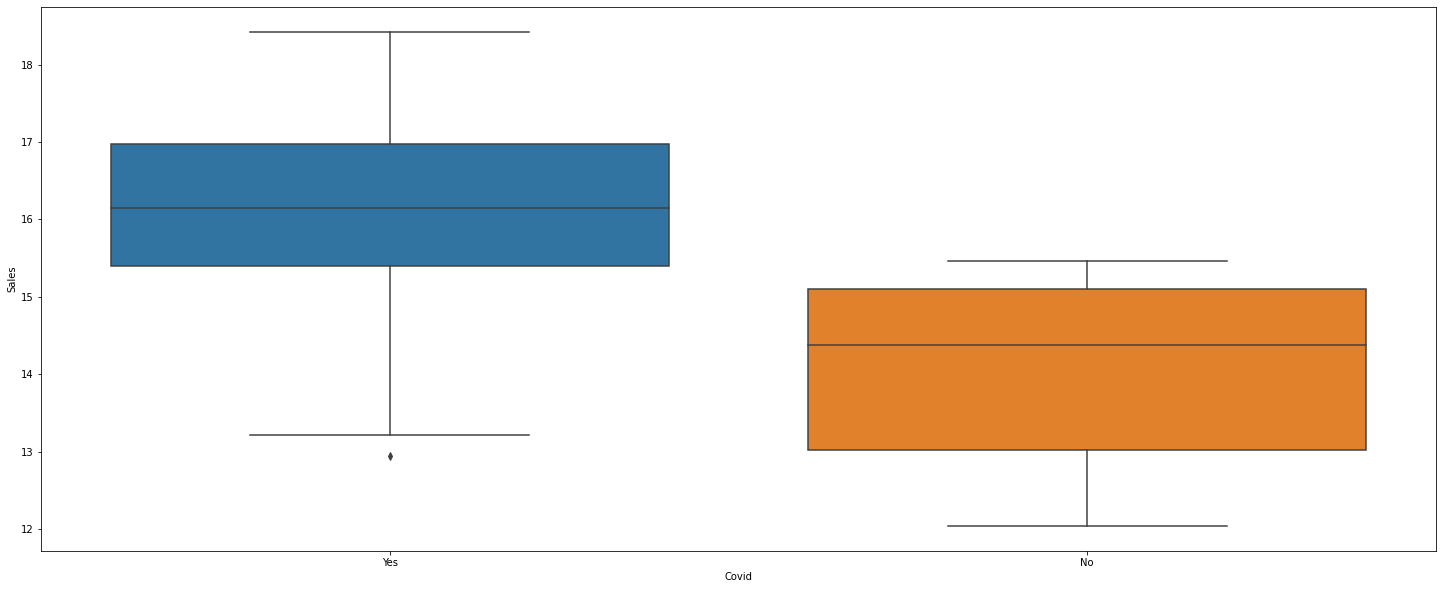

In [169]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Sales", data = df_salevali_weekly);

#### AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki haftalık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [170]:
from scipy.stats import shapiro

shapiro(Grup_Yes_w.Sales)

ShapiroResult(statistic=0.9685651063919067, pvalue=0.23347161710262299)

* Ho reddedilmez. Covid dönemindeki haftalık ortalama satışlar normal dağılmaktadır.

In [171]:
shapiro(Grup_No_w.Sales)

ShapiroResult(statistic=0.9287289381027222, pvalue=0.58772873878479)

* Ho reddedilmez. Covid dönemi öncesindeki haftalık ortalama satışlar normal dağılmaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [172]:
stats.levene(Grup_Yes_w.Sales, Grup_No_w.Sales)

LeveneResult(statistic=0.13699039252824713, pvalue=0.7128547358308839)

* Ho reddedilmez. Varyanslar Homojendir.

* Normallik testleri sonucunda Covid dönemi ve sonrası satış ortalamalarının dağılımı normal dağıldığı görülmektedir. 
* İki dönemin varyansları homojendir.
* Varsayımlarımız gerçekleştiğinden parametrik test olan T testi uygulanacaktır. 

##### Hipotez Testi

* Ho: Covid dönemi ve sonrası haftalık satış ortalamaları arasında fark yoktur.
* H1: Covid dönemi ve sonrası haftalık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Varsayımlarımız gerçekleştiğinden parametrik test olan T testi uygulanacaktır.

In [173]:
stats.ttest_ind(Grup_Yes_w.Sales, Grup_No_w.Sales, equal_var = True)

Ttest_indResult(statistic=3.4966394310584032, pvalue=0.0009981186083295422)

* Ho reddedilir. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

* Eğer varsayımlar gerçekleşmeseydi non parametrik test olan Mann Witney testi uygunacaktı.

##### 2. Non parametrik Test

In [174]:
stats.mannwhitneyu(Grup_Yes_w.Sales, Grup_No_w.Sales)

MannwhitneyuResult(statistic=206.0, pvalue=0.003579893495859883)

* Ho reddedilir. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

 * Sumdata ve Wocommerce datasetlerinde Covid dönemi öncesi ve covid dönemindeki aylık ve haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark olmadığı tespit ettik. 
 * Salevali datasetinde ise covid öncesi veriler bulunmadığından covid dönemi sonrası sadece bir aylık veri incelenerek haftalık bazlı inceleme yapılmıştır. Bu inceleme sonucunda çıkan covid dönemi ve sonrası haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark olduğu görülmektedir. Ancak covid dönemi sonrası sadece bir aylık(beş haftalık) veri olması ve bu verinin yetersiz olduğu kanaatiyle çıkan sonucun gerçekçi olmadığı düşünülmektedir. 

# 4- A/B TESTING FOR WHOLE DATA

##  Preprocessing Data

In [175]:
df_whole.head()

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total
0,2017-07-21 14:34:00,PERGAMO,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,BAL CESITLERI,HONIG,1.00,11.68
1,2017-09-05 12:05:31,PERGAMO,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,ZEYTINYAGI,ZEYTINYAGI,1.00,20.56
2,2017-09-10 12:53:04,PERGAMO,BIO HONIG LAVANDEL 450 GR,BAL CESITLERI,HONIG,1.00,8.40
3,2017-09-10 12:53:04,PERGAMO,BIO HONIG ORANGENBLUTEN 450 GR,BAL CESITLERI,HONIG,1.00,8.40
4,2017-09-10 12:53:04,PERGAMO,BIO HONIG ZITRONE 450 GR,BAL CESITLERI,HONIG,1.00,8.97


In [176]:
df_whole["Order Date"] = df_whole["Order Date"].astype("datetime64[ns]")

In [177]:
df_whole[(df_whole["Order Date"] >= "2020-02-01") & (df_whole["Order Date"] <= "2022-03-31")].sort_values(by = "Order Date").tail()


,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total
50946,2022-03-31,Amazon,WALNUSSE IN DER SCHALE/ *NEU ERNTE 2021*/ UNBE...,CEREZLER,WALNUSS,1.00,37.25
47563,2022-03-31,Wocommerce,TAZE CECIL PEYNIRI (KUYMAKLIK),PEYNIR CESITLERI,PEYNIR CESITLERI,1.00,5.40
44804,2022-03-31,Wocommerce,PEYNIR PAKETI,PEYNIR CESITLERI,PEYNIR CESITLERI,1.00,19.79
50945,2022-03-31,Amazon,WALNUSSE IN DER SCHALE/ *NEU ERNTE 2021*/ UNBE...,CEREZLER,WALNUSS,1.00,37.37
43747,2022-03-31,Amazon,PERGAMO NATURBELASSENE HASELNUSSE OHNE SCHALE ...,CEREZLER,HASELNUSS,1.00,12.10


In [178]:
df_whole["Covid"] = 0

In [179]:
df_whole.head()

,Order Date,Marketplace,Item Name,Category,Subcategory,Quantity,Total,Covid
0,2017-07-21 14:34:00,PERGAMO,COLMENEROS DE GRANADA KASTANIEN-BLUTEN-HONIG 4...,BAL CESITLERI,HONIG,1.00,11.68,0
1,2017-09-05 12:05:31,PERGAMO,KALTGEPRESSTES EXTRA NATIVES OLIVENOL ROYAL CA...,ZEYTINYAGI,ZEYTINYAGI,1.00,20.56,0
2,2017-09-10 12:53:04,PERGAMO,BIO HONIG LAVANDEL 450 GR,BAL CESITLERI,HONIG,1.00,8.40,0
3,2017-09-10 12:53:04,PERGAMO,BIO HONIG ORANGENBLUTEN 450 GR,BAL CESITLERI,HONIG,1.00,8.40,0
4,2017-09-10 12:53:04,PERGAMO,BIO HONIG ZITRONE 450 GR,BAL CESITLERI,HONIG,1.00,8.97,0


In [180]:
for i, j in df_whole["Order Date"].iteritems():
    if ((j >=pd.to_datetime("2020-02-01")) & (j <= pd.to_datetime("2022-03-31"))):
        df_whole["Covid"][i] = 1       

In [181]:
df_whole["Covid"].value_counts()

1    45887
0    14228
Name: Covid, dtype: int64

In [182]:
df_whole.set_index("Order Date", inplace =True)

### Aylık bazlı inceleme(Monthly)

In [183]:
df_whole_monthly = df_whole.resample("M").mean()

In [184]:
df_whole_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-31
Freq: M
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  61 non-null     float64
 1   Total     61 non-null     float64
 2   Covid     61 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


In [185]:
df_whole_monthly.dropna(how = "all", inplace = True)

In [186]:
df_whole_monthly.Covid.value_counts(dropna=False)

0.00    35
1.00    25
0.99     1
Name: Covid, dtype: int64

In [187]:
for i,j in df_whole_monthly.Covid.iteritems():
    print(i,j)

2017-07-31 00:00:00 0.0
2017-08-31 00:00:00 0.0
2017-09-30 00:00:00 0.0
2017-10-31 00:00:00 0.0
2017-11-30 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-31 00:00:00 0.0
2018-02-28 00:00:00 0.0
2018-03-31 00:00:00 0.0
2018-04-30 00:00:00 0.0
2018-05-31 00:00:00 0.0
2018-06-30 00:00:00 0.0
2018-07-31 00:00:00 0.0
2018-08-31 00:00:00 0.0
2018-09-30 00:00:00 0.0
2018-10-31 00:00:00 0.0
2018-11-30 00:00:00 0.0
2018-12-31 00:00:00 0.0
2019-01-31 00:00:00 0.0
2019-02-28 00:00:00 0.0
2019-03-31 00:00:00 0.0
2019-04-30 00:00:00 0.0
2019-05-31 00:00:00 0.0
2019-06-30 00:00:00 0.0
2019-07-31 00:00:00 0.0
2019-08-31 00:00:00 0.0
2019-09-30 00:00:00 0.0
2019-10-31 00:00:00 0.0
2019-11-30 00:00:00 0.0
2019-12-31 00:00:00 0.0
2020-01-31 00:00:00 0.0
2020-02-29 00:00:00 1.0
2020-03-31 00:00:00 1.0
2020-04-30 00:00:00 1.0
2020-05-31 00:00:00 1.0
2020-06-30 00:00:00 1.0
2020-07-31 00:00:00 1.0
2020-08-31 00:00:00 1.0
2020-09-30 00:00:00 1.0
2020-10-31 00:00:00 1.0
2020-11-30 00:00:00 1.0
2020-12-31 00:00

In [188]:

df_whole_monthly.Covid.loc["2022-03-31"] = 1

In [189]:
df_whole_monthly.Covid.value_counts(dropna=False)

0.00    35
1.00    26
Name: Covid, dtype: int64

In [190]:
df_whole_monthly["Covid"] = df_whole_monthly.Covid.map({0 : 'No', 1 : 'Yes'})

In [191]:
df_whole_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2017-07-31 to 2022-07-31
Freq: M
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  61 non-null     float64
 1   Total     61 non-null     float64
 2   Covid     61 non-null     object 
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [192]:
df_whole_monthly.Covid.value_counts(dropna=False)

No     35
Yes    26
Name: Covid, dtype: int64

In [193]:
df_whole_monthly

,Quantity,Total,Covid
Order Date,,,
2017-07-31,1.00,11.68,No
2017-08-31,2.00,8.20,No
2017-09-30,1.00,12.05,No
2017-10-31,2.25,15.41,No
2017-11-30,1.35,11.96,No
...,...,...,...
2022-03-31,1.24,16.45,Yes
2022-04-30,1.18,14.17,No
2022-05-31,1.17,8.06,No


In [194]:
df_whole_monthly.reset_index(inplace = True)

In [195]:
df_whole_monthly["Yes"] = 0
df_whole_monthly["No"] = 0

In [196]:
for i, j in df_whole_monthly["Covid"].iteritems():
    if j == "Yes":
        df_whole_monthly["Yes"].iloc[i] = df_whole_monthly["Total"].iloc[i]
    else:
        df_whole_monthly["No"].iloc[i] = df_whole_monthly["Total"].iloc[i]

In [197]:
Grup_Yes = df_whole_monthly[df_whole_monthly["Yes"] != 0][["Total","Yes"]]
Grup_Yes

,Total,Yes
31,10.16,10.16
32,10.54,10.54
33,8.58,8.58
34,10.17,10.17
35,9.44,9.44
36,8.85,8.85
37,12.35,12.35
38,13.20,13.20
39,12.83,12.83
40,12.25,12.25


In [198]:
len(Grup_Yes)

26

In [199]:
Grup_No = df_whole_monthly[df_whole_monthly["No"] != 0][["Total","No"]]
Grup_No

,Total,No
0,11.68,11.68
1,8.20,8.20
2,12.05,12.05
3,15.41,15.41
4,11.96,11.96
5,11.69,11.69
6,14.10,14.10
7,12.55,12.55
8,13.76,13.76
9,14.92,14.92


In [200]:
len(Grup_No)

35

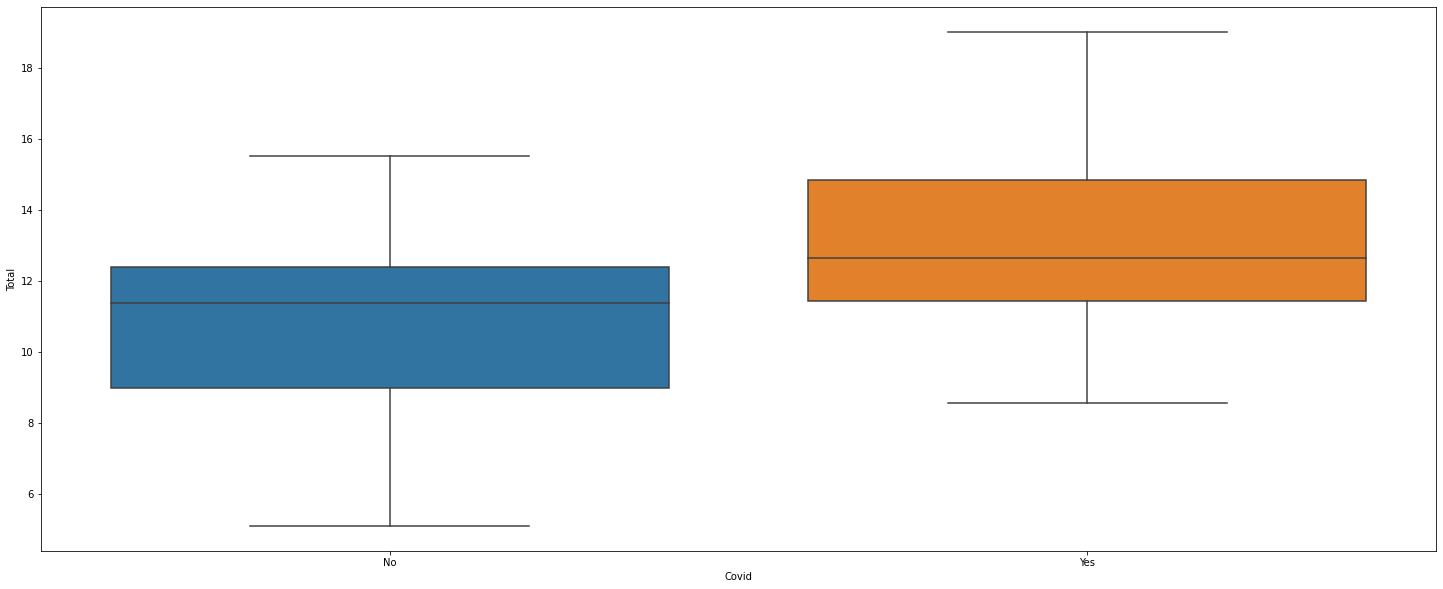

In [201]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Total", data = df_whole_monthly);

####  AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki aylık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki aylık ortalama satışlar normal dağılmamaktadır.

In [202]:
from scipy.stats import shapiro

shapiro(Grup_Yes.Total)

ShapiroResult(statistic=0.9752832651138306, pvalue=0.7615231871604919)

* Ho reddedilmez. Covid dönemindeki aylık ortalama satışlar normal dağılmaktadır.

In [203]:
shapiro(Grup_No.Total)

ShapiroResult(statistic=0.9744552373886108, pvalue=0.5764597654342651)

* Ho reddedilmez. Covid dönemi öncesi aylık ortalama satışlar normal dağılmaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [204]:
stats.levene(Grup_Yes.Total, Grup_No.Total)

LeveneResult(statistic=0.057706129597397786, pvalue=0.8109916428972337)

* Ho reddedimez. Varyanslar Homojendir.

* Normallik testleri sonucunda Covid öncesi ve Covid dönemisatış ortalamalarının dağılımı normal dağılmaktadır. 
* İki döneminde varyansları homojendir.
* Varsayımlarımız gerçekleştiğinden parametrik test olan T testi uygulanacaktır.

##### Hipotez Testi

* Ho: Covid öncesi ve Covid dönemlerinin aylık satış ortalamaları arasında fark yoktur.
* H1: Covid öncesi ve Covid dönemlerinin aylık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Varsayımlarımız gerçekleştiğinden parametrik test olan bağımsız iki grup T testi uygulayacağız.

In [205]:
stats.ttest_ind(Grup_Yes.Total, Grup_No.Total, equal_var = True)

Ttest_indResult(statistic=3.0776361956063534, pvalue=0.003162913548500044)

* Ho reddedilir. Her iki dönem aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

* Eğer varsayımlar gerçekleşmeseydi non parametrik test olan Man Whitney testi uygunacaktı.

##### 2. Non parametrik Test

In [206]:
stats.mannwhitneyu(Grup_Yes.Total, Grup_No.Total)

MannwhitneyuResult(statistic=642.0, pvalue=0.006530168452817257)

* Ho reddedilir. Her iki dönem aylık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

### Haftalık bazlı inceleme(Weekly)

In [207]:
df_whole_weekly = df_whole.resample("W").mean()

In [208]:
df_whole_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2017-07-23 to 2022-07-03
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  244 non-null    float64
 1   Total     244 non-null    float64
 2   Covid     244 non-null    float64
dtypes: float64(3)
memory usage: 8.1 KB


In [209]:
df_whole_weekly

,Quantity,Total,Covid
Order Date,,,
2017-07-23,1.00,11.68,0.00
2017-07-30,NaN,NaN,NaN
2017-08-06,NaN,NaN,NaN
2017-08-13,NaN,NaN,NaN
2017-08-20,NaN,NaN,NaN
...,...,...,...
2022-06-05,1.14,7.62,0.00
2022-06-12,1.21,8.64,0.00
2022-06-19,1.22,8.51,0.00


In [210]:
df_whole_weekly.Covid.value_counts(dropna=False)

0.00    130
1.00    112
NaN      15
0.92      1
0.33      1
Name: Covid, dtype: int64

In [211]:
for i,j in df_whole_weekly.Covid.iteritems():
    print(i,j)

2017-07-23 00:00:00 0.0
2017-07-30 00:00:00 nan
2017-08-06 00:00:00 nan
2017-08-13 00:00:00 nan
2017-08-20 00:00:00 nan
2017-08-27 00:00:00 nan
2017-09-03 00:00:00 0.0
2017-09-10 00:00:00 0.0
2017-09-17 00:00:00 0.0
2017-09-24 00:00:00 0.0
2017-10-01 00:00:00 nan
2017-10-08 00:00:00 0.0
2017-10-15 00:00:00 nan
2017-10-22 00:00:00 nan
2017-10-29 00:00:00 nan
2017-11-05 00:00:00 0.0
2017-11-12 00:00:00 0.0
2017-11-19 00:00:00 0.0
2017-11-26 00:00:00 0.0
2017-12-03 00:00:00 0.0
2017-12-10 00:00:00 0.0
2017-12-17 00:00:00 0.0
2017-12-24 00:00:00 0.0
2017-12-31 00:00:00 0.0
2018-01-07 00:00:00 0.0
2018-01-14 00:00:00 0.0
2018-01-21 00:00:00 0.0
2018-01-28 00:00:00 0.0
2018-02-04 00:00:00 0.0
2018-02-11 00:00:00 0.0
2018-02-18 00:00:00 0.0
2018-02-25 00:00:00 0.0
2018-03-04 00:00:00 0.0
2018-03-11 00:00:00 0.0
2018-03-18 00:00:00 0.0
2018-03-25 00:00:00 0.0
2018-04-01 00:00:00 0.0
2018-04-08 00:00:00 0.0
2018-04-15 00:00:00 0.0
2018-04-22 00:00:00 0.0
2018-04-29 00:00:00 0.0
2018-05-06 00:00

In [212]:
df_whole_weekly.Covid.loc["2022-04-03"] = 0
df_whole_weekly.Covid.loc["2020-02-02"] = 1

In [213]:
df_whole_weekly[df_whole_weekly["Covid"].isnull()]

,Quantity,Total,Covid
Order Date,,,
2017-07-30,NaN,NaN,NaN
2017-08-06,NaN,NaN,NaN
2017-08-13,NaN,NaN,NaN
2017-08-20,NaN,NaN,NaN
2017-08-27,NaN,NaN,NaN
2017-10-01,NaN,NaN,NaN
2017-10-15,NaN,NaN,NaN
2017-10-22,NaN,NaN,NaN
2017-10-29,NaN,NaN,NaN


In [214]:
df_whole_weekly.dropna(how = "all", inplace = True)

In [215]:
df_whole_weekly["Covid"] = df_whole_weekly.Covid.map({0 : 'No', 1 : 'Yes'})

In [216]:
df_whole_weekly.isnull().sum()

Quantity    0
Total       0
Covid       0
dtype: int64

In [217]:
df_whole_weekly[df_whole_weekly["Covid"].isnull() ]

,Quantity,Total,Covid
Order Date,,,


In [218]:
df_whole_weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2017-07-23 to 2022-07-03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Quantity  244 non-null    float64
 1   Total     244 non-null    float64
 2   Covid     244 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.6+ KB


In [219]:
df_whole_weekly.Covid.value_counts()

No     131
Yes    113
Name: Covid, dtype: int64

In [220]:
df_whole_weekly

,Quantity,Total,Covid
Order Date,,,
2017-07-23,1.00,11.68,No
2017-09-03,1.67,9.36,No
2017-09-10,1.00,13.38,No
2017-09-17,1.00,8.59,No
2017-09-24,1.00,12.31,No
...,...,...,...
2022-06-05,1.14,7.62,No
2022-06-12,1.21,8.64,No
2022-06-19,1.22,8.51,No


In [221]:
df_whole_weekly.reset_index(inplace = True)

In [222]:
df_whole_weekly["Yes"] = 0
df_whole_weekly["No"] = 0

In [223]:
for i, j in df_whole_weekly["Covid"].iteritems():
    if j == "Yes":
        df_whole_weekly["Yes"].iloc[i] = df_whole_weekly["Total"].iloc[i]
    else:
        df_whole_weekly["No"].iloc[i] = df_whole_weekly["Total"].iloc[i]

In [224]:
Grup_Yes_w = df_whole_weekly[df_whole_weekly["Yes"] != 0][["Total","Yes"]]
Grup_Yes_w

,Total,Yes
117,8.63,8.63
118,11.56,11.56
119,11.90,11.90
120,9.84,9.84
121,10.35,10.35
...,...,...
225,14.23,14.23
226,12.55,12.55
227,16.90,16.90
228,17.38,17.38


In [225]:
len(Grup_Yes_w)

113

In [226]:
Grup_No_w = df_whole_weekly[df_whole_weekly["No"] != 0][["Total","No"]]
Grup_No_w

,Total,No
0,11.68,11.68
1,9.36,9.36
2,13.38,13.38
3,8.59,8.59
4,12.31,12.31
...,...,...
239,7.62,7.62
240,8.64,8.64
241,8.51,8.51
242,8.66,8.66


In [227]:
len(Grup_No_w)

131

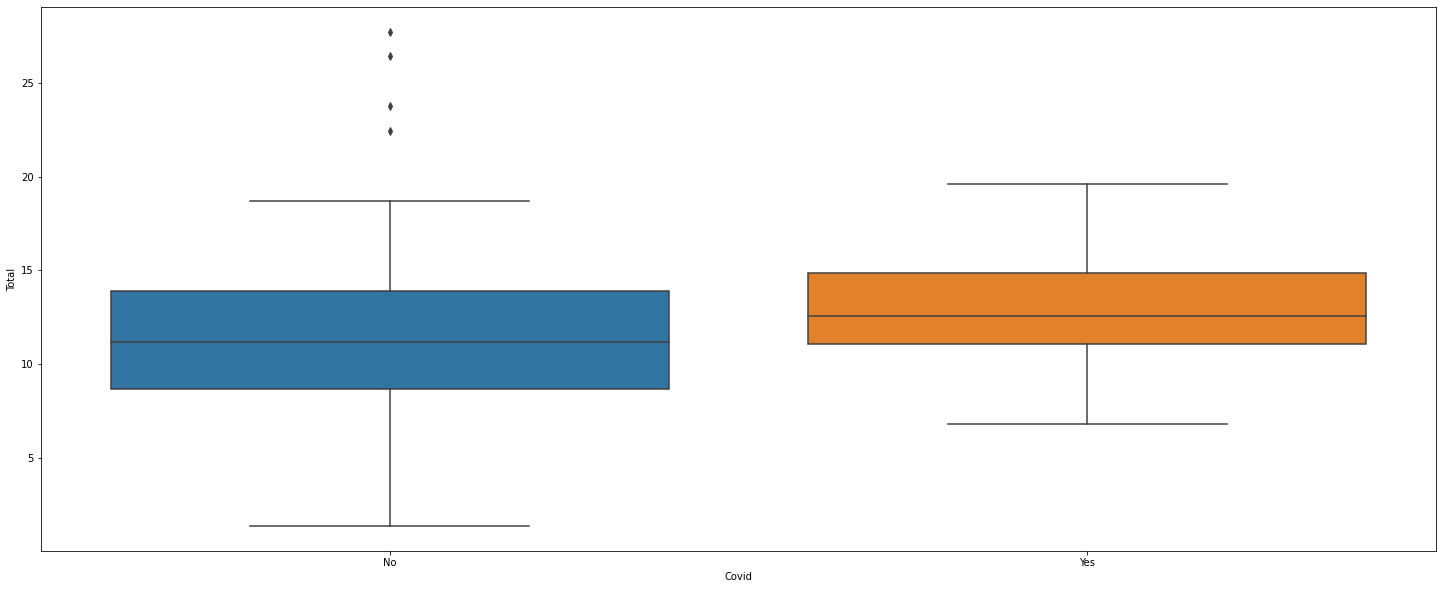

In [228]:
plt.figure(figsize=(25,10))
sns.boxplot(x = "Covid", y = "Total", data = df_whole_weekly);

#### AB Testing

##### Normallik Varsayımı

* Ho: Covid dönemindeki haftalık ortalama satışlar normal dağılmaktadır.
* H1: Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [229]:
from scipy.stats import shapiro

shapiro(Grup_Yes_w.Total)

ShapiroResult(statistic=0.9746886491775513, pvalue=0.03041127324104309)

* Ho reddedildi. Covid dönemindeki haftalık ortalama satışlar normal dağılmamaktadır.

In [230]:
shapiro(Grup_No_w.Total)

ShapiroResult(statistic=0.9420924782752991, pvalue=2.7419839170761406e-05)

* Ho reddedildi. Covid dönemi öncesindeki haftalık ortalama satışlar normal dağılmamaktadır.

##### Varyans Homojenliği Varsayımı

* H0: Varyanslar Homojendir.

* H1: Varyanslar Homojen değildir.

In [231]:
stats.levene(Grup_Yes_w.Total, Grup_No_w.Total)

LeveneResult(statistic=4.450013103294968, pvalue=0.03592827127702416)

* Ho reddedilir. Varyanslar Homojen değildir.

* Normallik testleri sonucunda Covid öncesi ve  Covid dönemi satış ortalamalarının dağılımının normal dağılmadığı görülmektedir. 
* İki döneminde varyansları homojen değildir.
* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

##### Hipotez Testi

* Ho: Covid öncesi ve Covid dönemlerinin haftalık satış ortalamaları arasında fark yoktur.
* H1: Covid öncesi ve Covid dönemlerinin haftalık satış ortalamaları arasında fark vardır.

##### 1. Parametrik Test

* Eğer varsayımlar gerçekleşseydi bağımsız iki grup T testi uygunacaktı.

In [232]:
stats.ttest_ind(Grup_Yes_w.Total, Grup_No_w.Total, equal_var = True)

Ttest_indResult(statistic=3.3749085719830307, pvalue=0.0008599293329595436)

* Ho reddedilir. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

##### 2. Non parametrik Test

* Varsayımlarımız gerçekleşmediğinden non parametrik test olan Mann Witney testi uygulanacaktır.

In [233]:
stats.mannwhitneyu(Grup_Yes_w.Total, Grup_No_w.Total)

MannwhitneyuResult(statistic=9516.0, pvalue=0.00012037257896832168)

* Ho reddedilir. Her iki dönem haftalık satış ortalamaları arasında istatistiki açıdan anlamlı bir fark vardır.

# SONUC

* Sumdata, Wocommerce ve Salevali datasetlerini birleştirerek oluşturuduğumuz tüm dataseti kullanılarak yaptığımız AB Testi sonucunda Covid öncesi ve Covid dönemlerinin aylık ve haftalık satış(ciro) ortalamaları arasında istatistiki açıdan anlamlı bir fark olduğunu bilimsel olarak tespit ettik. 
* Covid döneminde aylık ve haftalık ortalama satışların(ciroların) artmasının tesadüfi olmadığı görülmüştür.
* Tekrar Covid tedbirleri uygulamaya başlandığında ciroların artması beklenmektedir.